In [3]:
#БИБЛИОТЕКИ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [5]:
#ЗАГРУЗКА ДАННЫХ
df = pd.read_csv("garments_worker_productivity.csv", delimiter = ',')

In [6]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [7]:
#УДАЛЕНИЕ ТЕКСТОВЫХ ПОЛЕЙ И ПОЛЯ С ДАТОЙ
df = df.drop(['date', 'quarter', 'day', 'wip'], axis=1)

In [8]:
df.head()

,department,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,sweing,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,finishing,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,sweing,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,sweing,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,sweing,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382


In [9]:
#ЗАМЕНА ЗНАЧЕНИЙ У department
df['department'].replace({0: 'sweing', 1: 'finishing'}, inplace=True)

In [10]:
#ОБРАБОТКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ
df.replace(' ', np.nan, inplace=True)
df.dropna(inplace=True)

In [11]:
#НОРМАЛИЗАЦИЯ ДАННЫХ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['department']))

In [12]:
#КЛАСТЕРИЗАЦИЯ(МЕТОД K-MEANS)
def kmeans_f(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    return kmeans

In [15]:
#ВЫЧИСЛЕНИЕ ИНДЕКСА СИЛУЭТА К КАЖДОГО ЧИСЛА КЛАСТЕРОВ
def silhouette(X):
    silhouette_scores = []
    for n_clusters in range(2, 11):
        kmeans = kmeans_f(X, n_clusters)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    return silhouette_scores

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

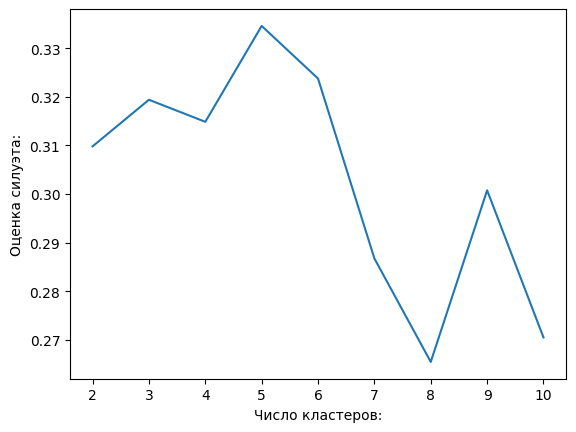

In [16]:
#ВИЗУАЛИЗАЦИЯ ИНДЕКСА СИЛУЭТА (В ЗАВИСИМОСТИ ОТ ЧИСЛА КЛАСТЕРОВ)
silhouette_scores = silhouette(X_scaled)
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Число кластеров:')
plt.ylabel('Оценка силуэта:')
plt.show()

In [17]:
#КЛАСТЕРИЗАЦИЯ МЕТОДОМ K-СРЕДНИХ
n_clusters = 4
kmeans = kmeans_f(X_scaled, n_clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:

#ДОБАВЛЕНИЕ МЕТОК КЛАСТЕРОВ В ДАТАФРЕЙМ
df['cluster'] = kmeans.labels_

In [19]:
#АНАЛИЗ КЛАСТЕРОВ
means = df.groupby(['cluster']).mean()
print(means)

             team  targeted_productivity        smv    over_time  incentive  \
cluster                                                                       
0        6.612663               0.738641   4.543371  1841.992551  30.858473   
1        6.293763               0.747183  23.058169  7250.945674  50.782696   
2        6.333333               0.583333  26.206667  6620.000000   7.666667   
3        6.218750               0.647625  25.319375  5340.750000  24.406250   

          idle_time   idle_men  no_of_style_change  no_of_workers  \
cluster                                                             
0          0.007449   0.037244               0.000      11.955307   
1          0.195171   0.080483               0.000      52.489940   
2        240.000000  32.333333               0.000      56.833333   
3          0.331250   1.781250               1.125      54.687500   

         actual_productivity  
cluster                       
0                   0.753013  
1                

<ipython-input-19-3dffae72ed56>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = df.groupby(['cluster']).mean()


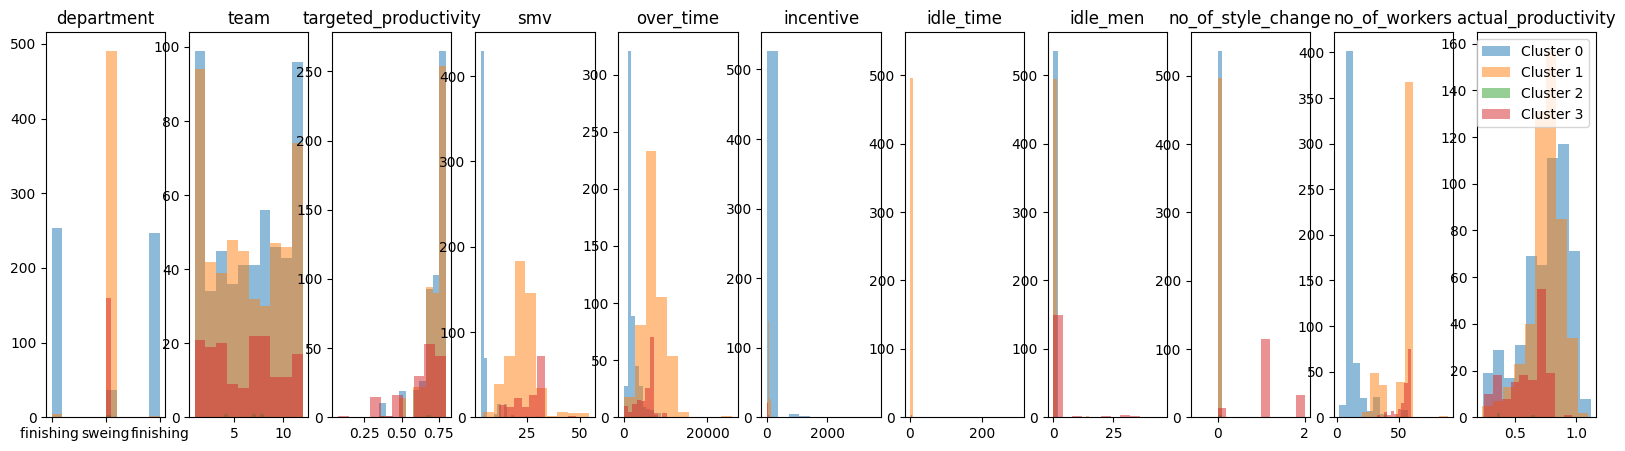

In [20]:
# График анализа кластеров
fig, ax = plt.subplots(1, len(df.columns)-1, figsize=(20,5))
for i, col in enumerate(df.columns[:-1]):
    for cluster in range(n_clusters):
        ax[i].hist(df[df['cluster'] == cluster][col], alpha=0.5, label=f'Cluster {cluster}')
        ax[i].set_title(col)
plt.legend()
plt.show()